### COMPUTATIONAL CARPETNARY PROJECT

***PART A - DATA STRUCTURES AND FUNCTIONS***

In [28]:
import pandas as pd
df = pd.read_csv("periodic_table.csv")

element_dict={}

for index, row in df.iterrows():
    symbol= row["Symbol"]
    mass =row["AtomicMass"]
    element_dict[symbol]=mass

#check it works 
for symbol in list(element_dict.keys())[:10]:
    print(symbol,":",element_dict[symbol])

H : 1.008
He : 4.0026
Li : 7.0
Be : 9.012183
B : 10.81
C : 12.011
N : 14.007
O : 15.999
F : 18.99840316
Ne : 20.18


- the csv file of the periodic table was loaded and from this an empty dictionnary was created
- by iterating over the rows of the dataframe, the element **symbol** as the key and the **atomic mass** as the value 
- this yielded a dictionnary that maps each element symbol to its atomic mass 




Now the goal is to write a function that takes chemcial formulas and returns the molecular mass 

In [29]:
def molecular_mass(formula):
    total_mass = 0
    i = 0
    while i < len(formula):
        symbol = formula[i]
        i += 1

        if i < len(formula) and formula[i].islower():
            symbol += formula[i]
            i += 1  

        num_str = ""
        while i < len(formula) and formula[i].isdigit():
            num_str += formula[i]
            i += 1
        count = int(num_str) if num_str else 1

        
        total_mass += element_dict[symbol] * count

    return total_mass


#check it works 
print("H2O :", molecular_mass("H2O"))     # ~18.015
print("He :", molecular_mass("He"))      # ~4.0026
print("C6H12O6:", molecular_mass("C6H12O6")) # ~180.156

H2O : 18.015
He : 4.0026
C6H12O6: 180.156


Calculating the Molecular Mass of a Formula

- a function molecular_mass(formula) was written that takes a chemical formula (e.g. "H2O") as input  
- inside the function, a variable total_mass is created and set to 0 → this will store the running sum of the molecular mass  
- a while loop goes through the formula one character at a time using an index i 

*Step 1: Identify the element symbol*
- the first character is always an uppercase letter (like "H" in "H2O", or "C" in "CO2")  
- if the next character is a lowercase letter, it is added to the symbol (so "He" or "Na" are treated as one element)  

*Step 2: Find how many atoms of that element are present*
- the code then looks for digits following the symbol (e.g. 2 in "H2O" or 12 in "C6H12O6")  
- if digits are found, they are combined into a number → this is the **count of atoms**  
- if no number is found, the count defaults to 1 

*Step 3: Look up the atomic mass*
- using the dictionary (element_dict), the atomic mass for the element symbol is found  
- the atomic mass is multiplied by the count of atoms  

*Step 4: Add to the total mass*
- the result for that element is added to total_mass  
- the loop continues until the whole formula has been processed  

*Final Step: Return the result*
- once the loop ends, the function returns total_mass → the total molecular mass of the formula  

---

*Example with "H2O"*
- Symbol = "H", Count = 2 → mass = 2 × 1.008 = 2.016  
- Symbol = "O", Count = 1 → mass = 1 × 15.999 = 15.999  
- **Total = 18.015**  


Now the idea is to extend the code for the mass calculator to be able to deal with parenthesis in the brute formula

In [30]:
def molecular_mass_parentheses(formula):
    partial = []   # will hold partial masses and markers
    i = 0

    while i < len(formula):
        if formula[i].isupper():
            symbol = formula[i]
            i += 1
            if i < len(formula) and formula[i].islower():
                symbol += formula[i]
                i += 1

            
            num_str = ""
            while i < len(formula) and formula[i].isdigit():
                num_str += formula[i]
                i += 1
            count = int(num_str) if num_str else 1

            
            partial.append(element_dict[symbol] * count)

        elif formula[i] == "(":
            partial.append("(")
            i += 1

        # 3. Handle closing parenthesis
        elif formula[i] == ")":
            i += 1
            # read number after )
            num_str = ""
            while i < len(formula) and formula[i].isdigit():
                num_str += formula[i]
                i += 1
            count = int(num_str) if num_str else 1

            # pop until "("
            temp = 0
            while partial and partial[-1] != "(":
                temp += partial.pop()
            partial.pop()  # remove "("
            partial.append(temp * count)

        else:
            i += 1  # skip unexpected

    return sum(partial)

print("H2O:",molecular_mass_parentheses("H2O"))      # ~18
print("Ca(OH)2:", molecular_mass_parentheses("Ca(OH)2"))  # ~74
print("Mg(OH(CH3)2)2:", molecular_mass_parentheses("Mg(OH(CH3)2)2"))


H2O: 18.015
Ca(OH)2: 74.094
Mg(OH(CH3)2)2: 118.459


Calculating Molecular Mass with Parentheses (Non-Recursive)

- the previous function worked for simple formulas (like *H2O* or *C6H12O6*), but it could not handle parentheses  
- to fix this, the function was extended to support groups like *(OH)2* in *Ca(OH)2*  
- the idea is to use a *stack* or a partial list, which is like a list where we add and remove values from the end  

How it works
1. *Read element symbols*
   - just like before, the code finds symbols (like *Ca*, *O*, *H*) and numbers after them  
   - the atomic mass multiplied by the count is pushed onto the stack  

2. *Handle "("*  
   - when an opening parenthesis is found, a marker "(" is pushed onto the stack  
   - this marks the beginning of a grouped part of the formula  

3. *Handle ")"* 
   - when a closing parenthesis is found, the code collects everything from the stack, going backwards, until it reaches "(" 
   - these masses are added together to get the total for the group inside the parentheses  
   - the number after the ")" tells how many times to multiply the group (e.g. 2 in *(OH)2*)  
   - the multiplied result is pushed back onto the stack  

4. *Finish the formula* 
   - when the loop ends, the stack contains all the individual contributions  
   - adding them together gives the total molecular mass  

Example: Ca(OH)2
- *Ca* → 40.08 pushed to the stack  
- "(" pushed as a marker  
- *O* → 15.999 pushed  
- *H* → 1.008 pushed  
- ")" closes the group → (15.999 + 1.008) × 2 = 34.014 pushed  
- Final stack = [40.08, 34.014] → total = 74.094  



Now we can try and make a new function that does the same thing but recursively 

In [31]:
def molecular_mass_parentheses(formula, i=0):
    total_mass = 0

    while i < len(formula):
        character = formula[i]

        
        if character == "(":
            group_mass, i = molecular_mass_parentheses(formula, i + 1)

            
            num_str = ""
            while i < len(formula) and formula[i].isdigit():
                num_str += formula[i]
                i += 1
            count = int(num_str) if num_str else 1

            total_mass += group_mass * count

        
        elif character == ")":
            return total_mass, i + 1

        
        elif character.isupper():
            symbol = character
            i += 1
            if i < len(formula) and formula[i].islower():
                symbol += formula[i]
                i += 1

            
            num_str = ""
            while i < len(formula) and formula[i].isdigit():
                num_str += formula[i]
                i += 1
            count = int(num_str) if num_str else 1

            total_mass += element_dict[symbol] * count

        else:
            i += 1  

    return total_mass, i

def molecular_mass(formula):
    mass, _ = molecular_mass_parentheses(formula, 0)
    return mass


# Tests
print("H2O:", molecular_mass("H2O"))         # ~18
print("Ca(OH)2:", molecular_mass("Ca(OH)2"))  # ~74
print("C6H12O6:", molecular_mass("C6H12O6"))  # ~180
print("Mg(OH(CH3)2)2:", molecular_mass("Mg(OH(CH3)2)2"))


H2O: 18.015
Ca(OH)2: 74.094
C6H12O6: 180.156
Mg(OH(CH3)2)2: 118.459


Calculating Molecular Mass with Parentheses (Recursive)

* the previous stack-based function worked, but recursion matches parentheses more naturally
* when we see an opening parenthesis, we recurse to compute the mass of the inner group
* when we hit the closing parenthesis, we return that group’s subtotal to the caller, which then applies any multiplier

How it works

1. *Read element symbols*

   * uppercase (optionally followed by lowercase) forms a symbol (*H*, *O*, *Ca*)
   * read digits right after the symbol for the count
   * add atomic_mass(symbol) × count to the current subtotal

2. *Handle "(" with a recursive call*

   * upon "(", call the same function on the substring that follows
   * the recursive call consumes characters until it reaches the matching ")"
   * it returns *(group\_mass, next\_index)* to the caller

3. *Handle ")" and apply multiplier*

   * when a call encounters ")", it returns the subtotal computed so far
   * the caller then reads digits after the ")" (e.g., the 2 in *(OH)2*)
   * multiply group_mass × multiplier and add it to the caller’s subtotal

4. *Finish the formula*

   * when the outer call reaches the end of the string, its subtotal is the total molecular mass

Example: *Ca(OH)2

* read *Ca* → add 40.08
* see "(" → recurse on OH)

  * inside: *O* → 15.999, H → 1.008 → inner subtotal 17.007
  * hit ")" → return 17.007
* read multiplier 2 → 17.007 × 2 = 34.014
* outer subtotal: 40.08 + 34.014 = 74.094


The next part of this project is to also take into account formulas with coordinated water. 

In [32]:
def molecular_mass_hydrate(formula):
    normalized = formula.replace("·", ".")
    parts = normalized.split(".")

    total = 0
    for part in parts:
        if not part:  
            continue
        i = 0
        coef_str = ""
        while i < len(part) and part[i].isdigit():
            coef_str += part[i]
            i += 1
        coef = int(coef_str) if coef_str else 1
        rest = part[i:]  
        
        chunk_mass = molecular_mass_parentheses(rest)
        if isinstance(chunk_mass, tuple):   
            chunk_mass = chunk_mass[0]


        total += coef * float(chunk_mass)   

   

    return round(total,3)


print("CuSO4.5H2O :", molecular_mass_hydrate("CuSO4.5H2O"))
print("CuSO6·12H2O :", molecular_mass_hydrate("CuSO6·12H2O"))
print("C6H4:", molecular_mass_hydrate("C6H4"))
print("Ca(OH)2.5H2O:", molecular_mass_hydrate("Ca(OH)2.5H2O"))


CuSO4.5H2O : 249.691
CuSO6·12H2O : 407.794
C6H4: 76.098
Ca(OH)2.5H2O: 164.169


Calculating Molecular Mass with Hydration Water

- some compounds contain **water molecules bound in their structure** (called hydration water),  
  for example *CuSO4·5H2O* or *CuSO6·12H2O*  
- our previous function handled simple formulas and parentheses, but it could not process the dot (. or ·) notation  
- to fix this, the function was extended to split the formula into **parts** separated by a dot  

How it works
1. *Split into parts*  
   - the formula is split wherever a . or · appears  
   - for example, *CuSO4·5H2O* becomes ["CuSO4", "5H2O"]  

2. *Read a leading coefficient*  
   - if a part starts with a number (like 5H2O), this number is the *multiplier* for that group  
   - if no number is present, the multiplier is assumed to be 1  

3. *Calculate the mass of each part*  
   - each chemical chunk (like *CuSO4* or *H2O*) is sent to the *parentheses-aware function*  
   - this returns the molecular mass of that part  

4. *Multiply and add to the total*  
   - the chunk mass is multiplied by the coefficient (e.g. 5 × H2O)  
   - the result is added to the running total  

5. *Return the result*  
   - after all parts are processed, the function returns the complete molecular mass including hydration water  

Example: CuSO6·12H2O
- *CuSO6* = 63.55 + 32.07 + (6 × 15.999) = *191.614*  
- *12H2O* = 12 × 18.015 = *216.18*  
- Total = 191.614 + 216.18 = *407.794 g/mol* 


*Code that didn't work*

In [33]:
def molecular_mass_hydrate(formula):
    normalized = formula.replace("·", ".")
    parts = normalized.split(".")

    total = 0
    for part in parts:
        if not part:  
            continue
        i = 0
        coef_str = ""
        while i < len(part) and part[i].isdigit():
            coef_str += part[i]
            i += 1
        coef = int(coef_str) if coef_str else 1
        rest = part[i:]  
        
        chunk_mass = molecular_mass_parentheses(rest)
        
        total += coef * float(chunk_mass)   

   

    return round(total,3)


print("CuSO4.5H2O :", molecular_mass_hydrate("CuSO4.5H2O"))
print("CuSO6·12H2O :", molecular_mass_hydrate("CuSO6·12H2O"))
print("C6H4:", molecular_mass_hydrate("C6H4"))
print("Ca(OH)2.5H2O:", molecular_mass_hydrate("Ca(OH)2.5H2O"))


TypeError: float() argument must be a string or a real number, not 'tuple'


In the initial attempt, the function written produced an error message saying that the operation `+=` was unsupported between an integer and a tuple. The reason for this is that it was assumed that the helper function would always return a single numeric value representing the molecular mass. In reality, it sometimes returned a tuple, typically containing two values: the calculated mass and the parsing position in the formula.

Because of this, when trying to add the result directly to the running total, Python was effectively trying to add a number to a tuple, which is not a valid operation. This mismatch between expected output (a number) and actual output (a tuple) caused the program to crash.

**Solution**

To solve this, only the numeric part of the result was extracted. It was  checked if the returned value was a tuple, and if so, only its first element was taken , which contained the actual molecular mass. By doing this, the calculation became consistent: a number was always being added to another number. 

This small adjustment ensured that the total accumulated correctly, and the program no longer produced a type error.


***PART B - STOECHIOMETRY AND REACTION BALANCING***

In [34]:
import re
import numpy as np
from fractions import Fraction
from math import gcd
from functools import reduce

def formula_in_dict(formula:str)-> dict:
    element_pattern = r"([A-Z][a-z]*)"
    number_pattern = r"(\d*)"
    pattern = element_pattern + number_pattern
    counts = {}
    for (element, count) in re.findall(pattern, formula):
        if count == "":
            count = 1
        else:
            count = int(count)
        if element in counts:
            counts[element] += count
        else:
            counts[element] = count
    return counts


def balance_reaction(reactants: list, products: list) -> list:
    all_species = reactants + products
    composition_dicts = [formula_in_dict(f) for f in all_species]
    all_elements = set()
    for composition_dict in composition_dicts:
        for elem in composition_dict.keys():
            all_elements.add(elem)
    elements = sorted(all_elements)

    matrix = []
    for elem in elements:
        row = []
        for mol_dict in composition_dicts:
             row.append(mol_dict.get(elem, 0))
        for i in range(len(reactants), len(all_species)):
            row[i] *= -1
        matrix.append(row)

    A = np.array(matrix, dtype=float)
    u, s, vh = np.linalg.svd(A)
    vec = vh[-1]
    non_zero_vals = vec[np.abs(vec) !=0]  
    min_val = np.min(np.abs(non_zero_vals)) 
    vec_scaled = vec / min_val
    coeffs_frac = [Fraction(c).limit_denominator() for c in vec_scaled]
    denominators = [f.denominator for f in coeffs_frac]
    def lcm(a,b): return abs(a*b)//gcd(a,b)
    lcm_total = reduce(lcm, denominators, 1)
    coeffs_int = [int(f * lcm_total) for f in coeffs_frac]

   

    non_zero_ints = [abs(x) for x in coeffs_int if x != 0]
    pgcd_total = reduce(gcd, non_zero_ints)
    coeffs_final = [x // pgcd_total for x in coeffs_int]

    if any(x < 0 for x in coeffs_final):
        coeffs_final = [-x for x in coeffs_final]


    return coeffs_final[:len(reactants)], coeffs_final[len(reactants):]

# Test 1 
reactants1 = ["H2", "O2"]
products1 = ["H2O"]
coeffs_reac1, coeffs_prod1 = balance_reaction(reactants1, products1)

print("Test 1: H2 + O2 → H2O")
print("Reactants:")
for mol, coef in zip(reactants1, coeffs_reac1):
    print(f"{coef} × {mol}")
print("Products:")
for mol, coef in zip(products1, coeffs_prod1):
    print(f"{coef} × {mol}")
print("-"*30)

# Test 2 
reactants2 = ["CH4", "O2"]
products2 = ["CO2", "H2O"]
coeffs_reac2, coeffs_prod2 = balance_reaction(reactants2, products2)

print("Test 2: CH4 + O2 → CO2 + H2O")
print("Reactants:")
for mol, coef in zip(reactants2, coeffs_reac2):
    print(f"{coef} × {mol}")
print("Products:")
for mol, coef in zip(products2, coeffs_prod2):
    print(f"{coef} × {mol}")
print("-"*30)

# Test 3 
reactants3 = ["CaO2H2", "H2SO4"]
products3 = ["CaSO4", "H2O"]
coeffs_reac3, coeffs_prod3 = balance_reaction(reactants3, products3)

print("Test 3: CaO2H2 + H2SO4 → CaSO4 + H2O")
print("Reactants:")
for mol, coef in zip(reactants3, coeffs_reac3):
    print(f"{coef} × {mol}")
print("Products:")
for mol, coef in zip(products3, coeffs_prod3):
    print(f"{coef} × {mol}")








Test 1: H2 + O2 → H2O
Reactants:
2 × H2
1 × O2
Products:
2 × H2O
------------------------------
Test 2: CH4 + O2 → CO2 + H2O
Reactants:
1 × CH4
2 × O2
Products:
1 × CO2
2 × H2O
------------------------------
Test 3: CaO2H2 + H2SO4 → CaSO4 + H2O
Reactants:
1 × CaO2H2
1 × H2SO4
Products:
1 × CaSO4
2 × H2O


## Chemical Reaction Balancing – Function Explanations

### `formula_in_dict` Function

**Purpose:**  
Convert a simple chemical formula into a dictionary `{symbol: count}`.  

**Limitations:**  
- Cannot handle formulas with parentheses (e.g., `Ca(OH)2`) or hydration dots (e.g., `CuSO4·5H2O`).  

**How it works:**  
1. `element_pattern` captures the chemical symbol by looking for an uppercase letter followed optionally by a lowercase letter (e.g., `H`, `He`, `Ca`).  
2. `number_pattern` captures the number of atoms following the element.  
3. If no number is present, it defaults to `1`.  
4. The function returns a dictionary where keys are element symbols and values are their counts.  

**Example:**  
```python
formula_in_dict("H2O")  # returns {"H": 2, "O": 1}



### `balance_reaction` Function

**Purpose:**  
Prepare the data for constructing the atom conservation matrix and calculate stoichiometric coefficients.

**How it works:**  
1. Receives two lists: one for reactants and one for products.  
2. Creates a list of all unique elements present in the reaction.  
3. Builds a matrix where:  
   - Each **row** corresponds to an element.  
   - Each **column** corresponds to a molecule.  
   - **Columns corresponding to products are negated** to reflect atom conservation.

**Example:**  
For the reaction `H2 + O2 → H2O`, the matrix `A` looks like:

H : [ 2, 0, -2] 

O : [ 0, 2, -1]

#### Mathematical Solution in `balance_reaction`

**Goal:**  
The function aims to determine a non-zero vector x such that A · x = 0, where x represents the stoichiometric coefficients.

**Method:**  
- Singular Value Decomposition (SVD) is applied with np.linalg.svd.
- This decomposition provides a basis of possible solutions.
- The vector corresponding to the smallest singular value (vh[-1]) is chosen as the solution.

**Normalization:**  
1. The solution vector is expressed as fractions to avoid rounding errors from floating-point numbers.
2. The coefficients are then multiplied by the least common multiple (LCM) of the denominators so they become integers.
3. The entire set of integers is simplified by dividing through the greatest common divisor (GCD).

**Return values:**  
- The final integer coefficients are separated into two lists:
   - One for the **reactants**.
   - One for the **products**.


In [35]:

def check_mass_conservation(reactants, products, coeffs_reac, coeffs_prod):
    total_reactants = sum(
        coeffs_reac[i] * molecular_mass(reactants[i]) for i in range(len(reactants))
    )
    total_products = sum(
        coeffs_prod[i] * molecular_mass(products[i]) for i in range(len(products))
    )
    if abs(total_reactants - total_products) < 0.01:
        print(f"✅ Mass balanced")
        return True
    else:
        print(f"❌ Mass not balanced")
        return False


# Test
reactants = ["CaO2H2", "H2SO4"]
products = ["CaSO4", "H2O"]

coeffs_reac, coeffs_prod = balance_reaction(reactants, products)
check_mass_conservation(reactants, products, coeffs_reac, coeffs_prod)

# Output: ✅ Mass balanced

✅ Mass balanced


True

*`check_mass_conservation` Function*

**Purpose:**  
Verify whether the total mass of reactants equals the total mass of products after balancing a chemical reaction.  

**How it works:**  
1. For each reactant, the function multiplies its stoichiometric coefficient (`coeffs_reac[i]`) by its molecular mass (`molecular_mass`).
2. The same procedure is performed for the products with their coefficients (`coeffs_prod[i]`).
3. The total mass of the reactants and products is calculated by adding these values.
4. The two totals are compared:
- Instead of checking for strict equality (which can fail due to floating-point rounding errors), the function checks whether the difference is less than a small tolerance (`0.01`).
- This ensures that tiny numerical errors do not result in a false imbalance.
5. A message is displayed if the mass is balanced and returns "True" or "False".





***PART C - SIMULATION AND MODELING***

***C.1 Monte Carlo π estimation*** 

The idea is to implement a function `estimate_pi(N)` that samples `N` points uniformly in the square [-1, 1] × [-1, 1], counts how many fall inside the unit circle, and returns the estimate of π.



In [2]:

import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(N: int, rng=None) -> float:
    if rng is None:
        rng = np.random.default_rng()
    x = rng.uniform(-1, 1, size=N)
    y = rng.uniform(-1, 1, size=N)
    inside = (x*x + y*y) <= 1
    return 4.0 * inside.mean()



In [3]:
for N in [100, 1000, 10000, 100000]:
    print(N, estimate_pi(N))

100 3.32
1000 3.12
10000 3.1708
100000 3.14024


***Estimating π with Monte Carlo***

A function `estimate_pi(N, rng=None)` was written that uses random sampling to approximate the value of π.

- The function takes the number of random points `N` as input.  
- It generates points uniformly inside the square [-1, 1] × [-1, 1].  
- It counts how many of these points fall inside the unit circle (radius 1).  
- The fraction of points inside is used to approximate π.


*Step 1: Initialize the random generator*
- If no random generator is provided (`rng=None`), the default numpy random generator is created with `np.random.default_rng()`.

*Step 2: Generate random points*
- Two arrays of length `N` are created:  
  - `x` → random values uniformly distributed between -1 and 1.  
  - `y` → random values uniformly distributed between -1 and 1.

*Step 3: Check which points are inside the circle*
- A boolean mask `inside` is created, where each entry is `True` if the condition  
  $x^2 + y^2 \leq 1$  holds (the point lies inside or on the circle), and `False` otherwise.


*Step 4: Estimate π*
- The mean of `inside` gives the fraction of points inside the circle.  
- This fraction is multiplied by 4 to estimate π, because the area of the square is 4 and the area of the circle is π.  
- The function returns this estimate as a float.

*Final Step: Return the result*
- The function outputs the Monte Carlo estimate of π.


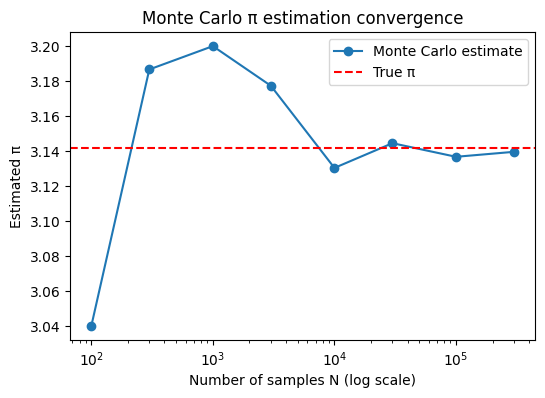

In [4]:
Ns = [100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
pi_estimates = [estimate_pi(N) for N in Ns]

plt.figure(figsize=(6,4))
plt.plot(Ns, pi_estimates, marker='o', label='Monte Carlo estimate')
plt.axhline(np.pi, color='r', linestyle='--', label='True π')
plt.xscale('log')
plt.xlabel('Number of samples N (log scale)')
plt.ylabel('Estimated π')
plt.title('Monte Carlo π estimation convergence')
plt.legend()
plt.show()

***Plotting the Convergence of the π Estimate***

This code plots how the Monte Carlo estimate of π improves as the number of samples `N` increases.


*Step 1: Define the sample sizes*
- A list `Ns` is created with different values of N (100, 300, 1000, 3000, 10000, 30000, 100000, 300000).  
- These represent the number of random points used in the Monte Carlo simulation.

*Step 2: Compute the estimates*
- For each value of N, the function `estimate_pi(N)` is called.  
- The results are stored in the list `pi_estimates`.

*Step 3: Create the plot*
- A new figure of size (6,4) is created.  
- The estimates are plotted as blue points connected with lines (`marker='o'`, label = "Monte Carlo estimate").  
- A horizontal dashed red line is added at the true value of π (`np.pi`) for comparison.

*Step 4: Adjust the axes and labels*
- The x-axis is set to a logarithmic scale (`plt.xscale('log')`) to better visualize the wide range of N values.  
- Labels for the x-axis ("Number of samples N (log scale)") and y-axis ("Estimated π") are added.  
- A title is added to describe the plot ("Monte Carlo π estimation convergence").  
- A legend is included to distinguish between the estimate and the true value.

*Final Step: Display the plot*
- The plot is shown with `plt.show()`.  
- The resulting graph demonstrates how the estimate of π converges toward the true value as N increases.



***C.1 – Discussion***

The convergence plot shows that the Monte Carlo estimate of π fluctuates a lot for small values of N. This is because random noise dominates when the number of samples is low, which leads to large deviations from the true value. At N = 1000–3000, the estimate can overshoot or undershoot π significantly.

As N increases, the estimates stabilize and approach the true value of π. This is an illustration of the Law of Large Numbers: as the number of random samples grows, the average result converges to the expected probability.

The error decreases approximately as $1/\sqrt{N}$, meaning that to improve precision by one decimal place, about 100 times more samples are needed. This trade-off highlights both the power and the cost of Monte Carlo methods: they are easy to implement and generalize, but require many samples for high accuracy.




***C.2 Chemistry-inspired Monte Carlo***

Now the goal is to simulate random molecular collisions in a box, assign energies (from a chosen distribution), and estimate the **reaction probability** as the fraction of collisions exceed a threshold energy.


IMPORTS 

In [39]:
import numpy as np
import matplotlib.pyplot as plt

***Function: simulate_collision_energies***

*simulate_collision_energies(M, dist, rng, **kwargs)* :  generates an array of M random collision energies using a chosen distribution (exponential, uniform, or normal). The parameters for that distribution are passed (e.g., scale for exponential), and values from the normal are clipped at 0 so energies stay non-negative. If a random generator is provided (rng=np.random.default_rng(seed)), the draw is reproducible.

In [41]:

def simulate_collision_energies(M: int, dist: str = 'normal', rng=None, **kwargs) -> np.ndarray:
   
    if rng is None:
        rng = np.random.default_rng()

    if dist == "exponential":
        scale = kwargs.get("scale", 2.0)
        E = rng.exponential(scale, size=M)

    elif dist == "uniform":
        low  = kwargs.get("low", 0.0)
        high = kwargs.get("high", 10.0)
        E = rng.uniform(low, high, size=M)

    elif dist == "normal":
        mean = kwargs.get("mean", 5.0)
        std  = kwargs.get("std",  2.0)
        E = rng.normal(mean, std, size=M)
        E = np.clip(E, 0.0, None)  # energies must be non-negative

    else:
        raise ValueError("dist must be one of: 'exponential', 'uniform', 'normal'.")

    return E

***Function reaction_probability*** 

**Reaction probability** estimates reaction probability as fraction of energies $\geq$ $E_{thresh}$.
Given energies $E_1,\dots,E_M$ and a threshold $E_{\text{th}}$,

$$
\hat{p}
= \frac{\#\{\,i:\; E_i \ge E_{\text{th}}\,\}}{M}
= \frac{1}{M}\sum_{i=1}^M \mathbf{1}\{E_i \ge E_{\text{th}}\}.
$$




In [42]:

def reaction_probability(energies: np.ndarray, E_thresh: float) -> float:

    return float(np.count_nonzero(energies >= E_thresh)) / energies.size

***Function binom_ci_95***

**95% confidence interval for a binomial proportion.(normal approximation).**
With $n$ trials and estimate $\hat p$,

$$
\mathrm{SE}
= \sqrt{\frac{\hat p(1-\hat p)}{n}}, \qquad
\text{CI}_{95\%}
= \hat p \pm 1.96\,\mathrm{SE}
= \hat p \pm 1.96 \sqrt{\frac{\hat p(1-\hat p)}{n}}.
$$



In [43]:
def binom_ci_95(p_hat: float, n: int):

    se = np.sqrt(max(p_hat*(1 - p_hat), 1e-12) / n)
    return (p_hat - 1.96*se, p_hat + 1.96*se)

p_hat = 0.6721  (95% CI: [0.6692, 0.6750])


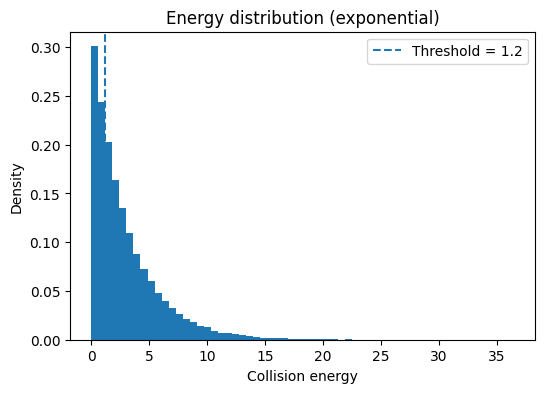

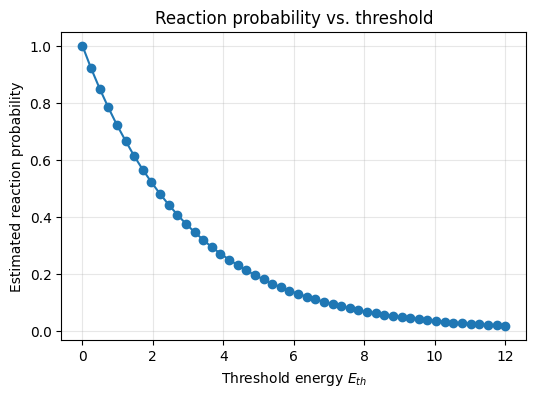

In [ ]:
M = 100_000  
E_thresh = 1.2

dist = "exponential"          
dist_params = dict(scale=3.0) 


rng = np.random.default_rng(42)                          
E = simulate_collision_energies(M, dist=dist, rng=rng, **dist_params)


p_hat = reaction_probability(E, E_thresh)                 
ci = binom_ci_95(p_hat, M)                                
print(f"p_hat = {p_hat:.4f}  (95% CI: [{ci[0]:.4f}, {ci[1]:.4f}])")



plt.figure(figsize=(6,4))                                 
plt.hist(E, bins=60, density=True)                        
plt.axvline(E_thresh, linestyle="--", label=f"Threshold = {E_thresh}")  
plt.xlabel("Collision energy")
plt.ylabel("Density")
plt.title(f"Energy distribution ({dist})")
plt.legend()
plt.show()  


E_thresh_values = np.linspace(0.0, 12.0, 50)   

p_vals = []
for thr in E_thresh_values:
    p_vals.append(reaction_probability(E, thr))  

plt.figure(figsize=(6,4))
plt.plot(E_thresh_values, p_vals, marker="o")    
plt.xlabel("Threshold energy $E_{th}$")
plt.ylabel("Estimated reaction probability")
plt.title("Reaction probability vs. threshold")
plt.grid(True, alpha=0.3)
plt.show()

***C.2 – Discussion***

* **Model.** Each collision gets an energy $E$ from the chosen distribution (we used *exponential* with mean = 3 unless noted).
* **Reaction criterion.** Reaction occurs if $E \ge E_{th}$. The estimator is $\hat p = k/M$ with $k$ successes.
* **Uncertainty.** Approximate 95% CI: $\hat p \pm 1.96\sqrt{\hat p(1-\hat p)/M}$.
* **Observations.** As $M$ increases, variance shrinks and $\hat p$ stabilizes. Increasing $E_{th}$ lowers the reaction probability; the curve’s shape depends on the assumed energy distribution (physics intuition: higher activation energy → rarer events).
* **Chemistry link.** This mirrors the idea of activation energy: at fixed temperature (energy distribution), only a fraction of collisions have enough energy to react.
